+ Naive Bayes is a simple but surprisingly powerfull algorithm for predictive modeling
+ **[Bayes theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)**

### Type of Naive Bayes
+ This link: **[Type of Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)**
  + Gaussian Naive Bayes
  + Multinomial Naive Bayes
  + Complement Naive Bayes
  + Bernoulli Naive Bayes

In [10]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('/home/tuandinh/Desktop/MachineLearning/Naive Bayes/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

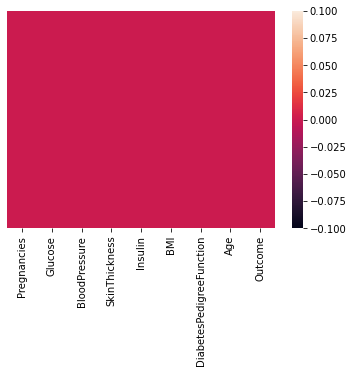

In [15]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False)

In [19]:
from sklearn.model_selection import train_test_split
Y = df['Outcome']
X = df.drop('Outcome', axis=1)
X = X.values
Y = Y.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)
model = GaussianNB()
model.fit(x_train, y_train)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


GaussianNB()

In [20]:
O_predict = model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
score = accuracy_score(O_predict, y_test)
print(f"Accurancy score: {score}")

Accurancy score: 0.7272727272727273


In [23]:
print(metrics.classification_report(O_predict, y_test))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       101
           1       0.60      0.64      0.62        53

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.73      0.73       154



### Using Logistic Regresion

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter = 500)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [27]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.74      0.80       117
           1       0.46      0.70      0.55        37

    accuracy                           0.73       154
   macro avg       0.67      0.72      0.68       154
weighted avg       0.78      0.73      0.74       154

